In [33]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',
                          index_col='date',
                          parse_dates=True)['demandas']

In [35]:
'''
order(
      p = defini a ordem do polinômio autorregressivo,
      d = defini a ordem do operador de diferença simples,
      q = defini a ordem do polinômio média móvel simples
      )
      
seasonal_order(
               P = defini a ordem do polinômio autorregressivo sazonal,
               D = defini a ordem do operador de diferença sazonal,
               Q = defini a ordem do polinômio média móvel sazonal,
               s = é um inteiro que dá a periodicidade (número de períodos na temporada)
               )
'''
#nosso s seria 52

params={
    'freq':'7d',
    'tren':'ct',
    'order':(8,1,3),
    'seasonal_order':(1,2,0,52),
}

In [36]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

In [37]:
model=sm.tsa.statespace.SARIMAX(df_train,**params)
results=model.fit()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\marcio

In [38]:
previsao_test = results.predict(start=len(df_train),end=len(df_train)+len(df_test)-1,dynamic=True)

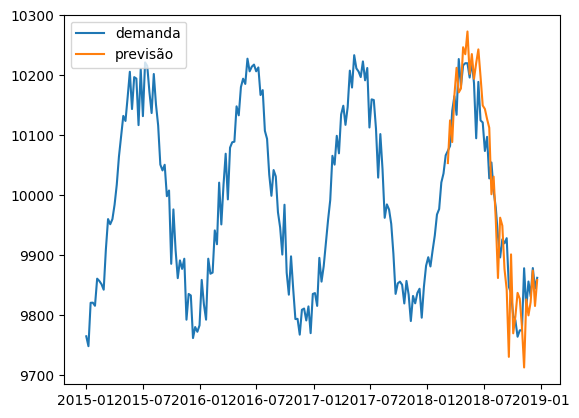

In [39]:
plt.plot(df_demandas,label='demanda')
plt.plot(previsao_test,label='previsão')
plt.legend()

In [40]:
previsao_test

2018-03-08    10053.484305
2018-03-15    10124.703020
2018-03-22    10088.548845
2018-03-29    10166.488560
2018-04-05    10212.317873
2018-04-12    10171.296730
2018-04-19    10177.781744
2018-04-26    10246.639375
2018-05-03    10234.898274
2018-05-10    10272.858023
2018-05-17    10202.168236
2018-05-24    10235.202326
2018-05-31    10193.990062
2018-06-07    10220.206730
2018-06-14    10242.988321
2018-06-21    10197.686784
2018-06-28    10149.528427
2018-07-05    10143.614029
2018-07-12    10126.904154
2018-07-19    10112.345533
2018-07-26    10001.525205
2018-08-02    10030.949915
2018-08-09     9958.791868
2018-08-16     9861.894286
2018-08-23     9962.438990
2018-08-30     9949.140202
2018-09-06     9876.853009
2018-09-13     9842.918542
2018-09-20     9730.475877
2018-09-27     9901.293584
2018-10-04     9769.709143
2018-10-11     9798.112340
2018-10-18     9837.169573
2018-10-25     9827.453965
2018-11-01     9781.218149
2018-11-08     9712.785977
2018-11-15     9826.221844
2

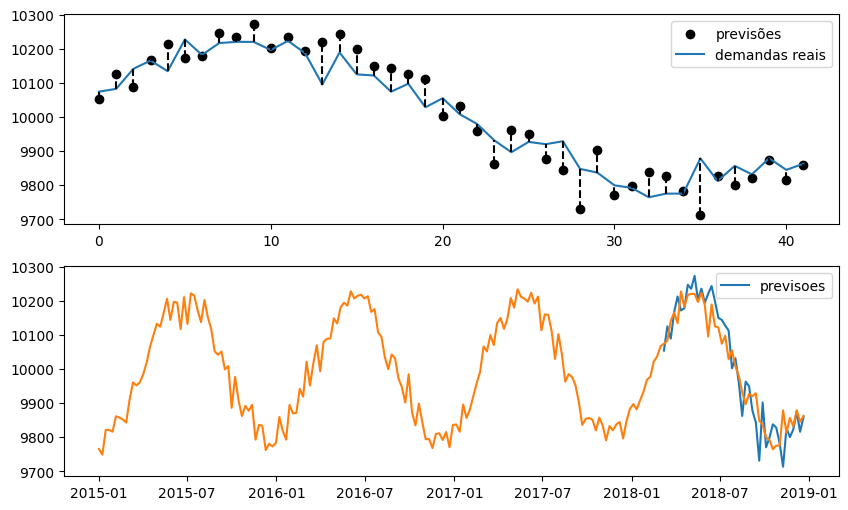

In [41]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)


plt.scatter(range(len(df_test)),previsao_test,label='previsões',color='black')
plt.plot(range(len(df_test)),df_test,label='demandas reais')
plt.legend()
indice = 0 
for i in range(len(previsao_test)):
    if previsao_test[i] > df_test.iloc[i]:
        plt.vlines(x=i, ymin=df_test.iloc[i], ymax=previsao_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsao_test[i], ymax=df_test.iloc[i],linestyle='--',color='black')
    indice+=1



ax=fig.add_subplot(2,1,2)
plt.plot(previsao_test,label='previsoes')
plt.plot(df_demandas)
plt.legend()

In [42]:
import numpy as np

In [43]:
residuos = np.array(df_test)-np.array(previsao_test)

In [44]:
import seaborn as sns

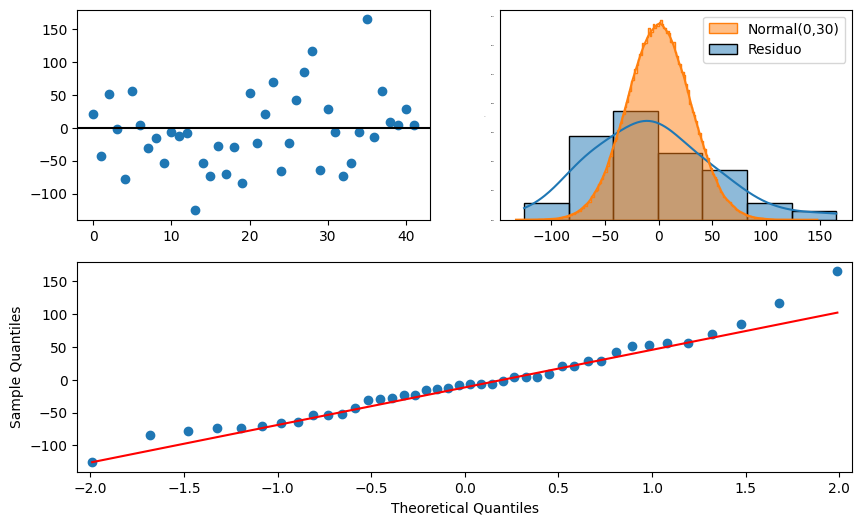

In [45]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,2,1)

plt. axhline(y=0,xmin=0,xmax=len(df_demandas),color='black')
plt.scatter(range(len(residuos)),residuos)

ax=fig.add_subplot(2,2,2)
sns.histplot(residuos,kde=True,stat='density',label="Residuo")
sns.histplot(np.random.normal(0, 30,200000),kde=True,stat='density',element='step',label='Normal(0,30)')
plt.legend()
plt.tick_params(axis='y', labelsize=0, length=0)
plt.ylabel([], fontsize=0)

ax=fig.add_subplot(2,1,2)
sm.qqplot(residuos,line='q',ax=ax)
plt.show()

In [46]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',sm.tools.eval_measures.rmse(previsao_test, df_test, axis=0))

print('MAE_Teste =',sm.tools.eval_measures.meanabs(previsao_test, df_test, axis=0))

RMSE_Teste = 57.190651266512496
MAE_Teste = 44.27519216323933


# Fase de Previsão

In [47]:
qtd_previsoes = 52

In [48]:
for i in range(3):
        
    model = sm.tsa.statespace.SARIMAX(df_demandas,**params)
    results = model.fit()
    previsao = results.predict(start=len(df_demandas),end=len(df_demandas)+qtd_previsoes-1,dynamic=True)
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_sar/Previsao_sar{i}.txt", "w") as arquivo:
        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\marcio

KeyboardInterrupt: 